# **1. Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np

# for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# for preprocessing
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

# tensorflow

import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras_preprocessing.image import ImageDataGenerator


In [ ]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [ ]:
# Shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
print(np.unique(Y_train))

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
model.compile(optimizer='adam',
                         loss = 'sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


print('Shape of Train Dataset',train_df.shape)
print('Shape of Test Dataset',test_df.shape)

Shape of Train Dataset (42000, 785)
Shape of Test Dataset (28000, 784)


In [ ]:
train_df.tail(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.tail(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **2. Explore Datasets**

In [ ]:
train_label = train_df['label'].value_counts()

plot_bar(train_label,'Distribution of Labels (Train Dataset)', 'labels','count')


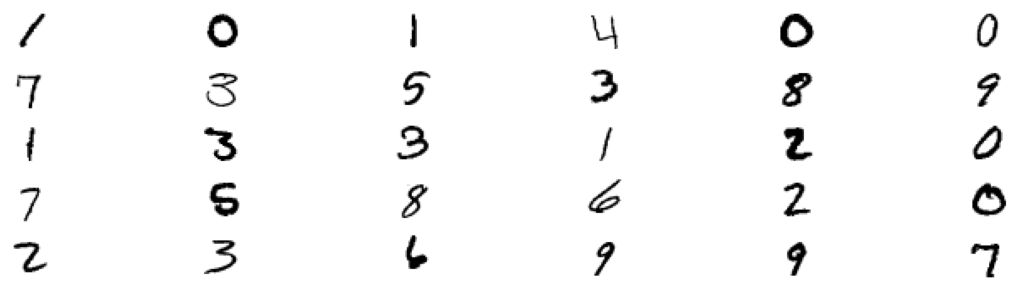

In [ ]:
for_visual = train_df.drop('label',axis=1).values

plt.figure(figsize=(20,5))
for i in range(30):
    plt.subplot(5, 6, i+1)
    plt.imshow(for_visual[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')

# **3. Preprocessing**

In [ ]:
# X stands for features
X = train_df.drop('label',axis=1)
# Reshape the form of original dataset
X = X.values.reshape(42000,28,28,1)

# y stands for labels (target value)
y = train_df['label']

y = to_categorical(y, num_classes = 10)

test_df = test_df.values.reshape(28000,28,28,1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=116)

In [ ]:
training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_datagen.fit(X_train)

validation_datagen.fit(X_val)

In [ ]:
training_datagen = training_datagen.flow(X_train, y_train, batch_size=128)
validation_datagen = validation_datagen.flow(X_val, y_val, batch_size = 128)

# 4. **Modeling**

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64,kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3, 3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation = "softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)          36928     
                                                      

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 5,
                                                  min_delta = 0.0001,
                                                  verbose = 1,
                                                  restore_best_weights = True)

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(training_datagen,
                    validation_data = validation_datagen,
                    epochs=20,
                    verbose = 1,
                    validation_steps=3,
                    callbacks=[early_stopping])

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)
print(loss)

In [ ]:
plt.imshow(X_test[3])
plt.show()
print("The num is ",Y_test[3])

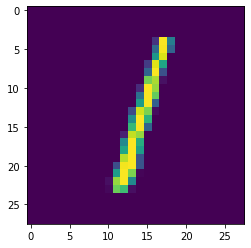

The num is  1


In [ ]:
plt.imshow(X_test[2])
plt.show()
print("The num is ",Y_test[2])

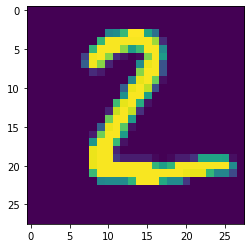

The num is  2


In [ ]:
plt.imshow(X_test[1])
plt.show()
print("The num is ",Y_test[1])

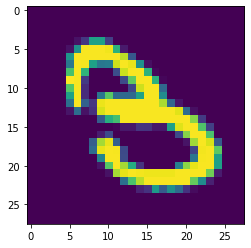

The num is  3


In [ ]:
plt.imshow(X_test[18])
plt.show()
print("The num is ",Y_test[18])

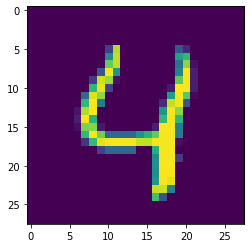

The num is  4


In [ ]:
plt.imshow(X_test[4])
plt.show()
print("The num is ",Y_test[4])

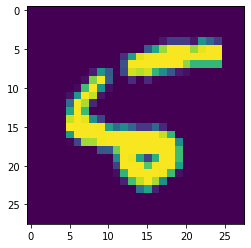

The num is  5


In [ ]:
plt.imshow(X_test[8])
plt.show()
print("The num is ",Y_test[8])

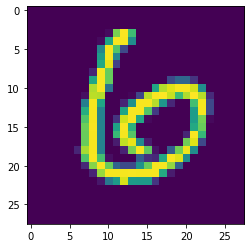

The num is  6


In [ ]:
plt.imshow(X_test[11])
plt.show()
print("The num is ",Y_test[11])

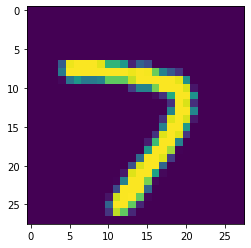

The num is  7


In [ ]:
plt.imshow(X_test[17])
plt.show()
print("The num is ",Y_test[17])

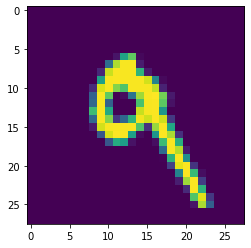

The num is  9


In [ ]:
plt.imshow(X_test[7])
plt.show()
print("The num is ",Y_test[7])

In [ ]:
Y_pred=model.predict(X_test)
Y_test = np.argmax(Y_pred,axis=1)
print(Y_test.shape)

313/313 [==============================] - 14s 45ms/step
(10000,)


In [ ]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

In [ ]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

In [ ]:
run_test_harness()

KeyboardInterrupt: ignored

# **5. Model Evaluation**

# 6. **Submit to Competition**

In [ ]:
epoch = history.epoch

color = ['#67001f','#b2182b','#4393c3','#2166ac']

fig1 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['accuracy'],line_color=color[0],name='1.train_accuracy score'),

    go.Line(x = epoch, y = history.history['val_accuracy'],line_color=color[3],name='2.val_accuracy score')
])

fig2 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['loss'],line_color = color[1],name='3.train_loss'),

    go.Line(x = epoch, y = history.history['val_loss'], line_color = color[2],name='4.val_loss')
])

figures = [fig1,fig2]
title = ['Accuracy & Validation Accuracy Score','Loss & Validation Loss Score']
fig = make_subplots(cols=len(figures),
                   subplot_titles=(title[0], title[1]))

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i+1)

fig.update_xaxes(title_text="epochs", row=1, col=1)
fig.update_xaxes(title_text="epochs", row=1, col=2)

fig.update_yaxes(title_text="Accuracy", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.update_layout(template = "simple_white", title = 'Accuracy & LOSS',
                 font = dict(size=17, family = 'Franklin Gothic'))

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
def scheduler(epoch, lr):

    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
r = model.fit(X,y,epochs=50,callbacks=callback,validation_data=(X_test,Y_test))
fig = px.line(y=r.history['accuracy'],title='Train Accuracy',template="plotly_dark")

fig.update_layout(

    title_font_color="#41BEE9",
    xaxis=dict(color="#41BEE9",title='Epochs'),
    yaxis=dict(color="#41BEE9",title='Accuracy')
)
fig.show()

Epoch 1/50
1313/1313 [==============================] - ETA: 0s - loss: 0.3029 - accuracy: 0.9277

ValueError: ignored

In [ ]:
fig = px.line(y=r.history['val_accuracy'],title='Validation Accuracy',template="plotly_dark")

fig.update_layout(

    title_font_color="#41BEE9",
    xaxis=dict(color="#41BEE9",title='Epochs'),
    yaxis=dict(color="#41BEE9",title='Accuracy')
)
fig.show()

In [ ]:
fig = px.line(y=r.history['loss'],title='Train Loss',template="plotly_dark")

fig.update_layout(

    title_font_color="#41BEE9",
    xaxis=dict(color="#41BEE9",title='Epochs'),
    yaxis=dict(color="#41BEE9",title='Loss')
)
fig.show()

In [ ]:
fig = px.line(y=r.history['val_loss'],title='Validation Loss',template="plotly_dark")

fig.update_layout(

    title_font_color="#41BEE9",
    xaxis=dict(color="#41BEE9",title='Epochs'),
    yaxis=dict(color="#41BEE9",title='Loss')
)
fig.show()

In [ ]:
result = model.predict(test_df)
result

In [ ]:
classes = np.argmax(result,axis = 1)
